In [2]:
import os
import sys
import glob
import time
import argparse

import numpy as np
from matplotlib import pyplot as plt

In [89]:
address_0 = 'ae_label_baseline'
print(address_0)
results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz']
results_list = [results_list[1]]

#    logs_list = ['logs_aebatch10_0', 'logs_aebatch10_1', 'logs_aebatch10_2', 'logs_aebatch128_0'] #'logs',logs_adam_0 logs_adam_1
logs_list = ['logs', 'logs_adam_0', 'logs_adam_1']
logs_list = logs_list[0:2]
print(logs_list)

ae_label_baseline
['logs', 'logs_adam_0']


logs
logs_adam_0


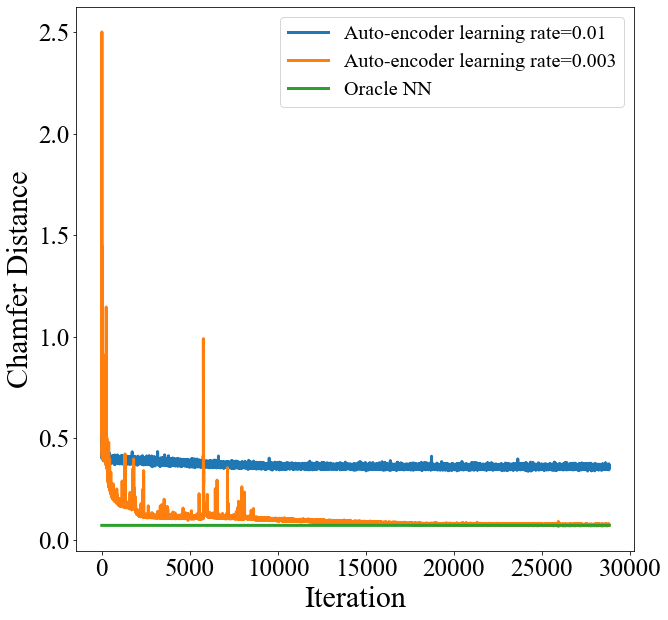

In [91]:
fig = plt.figure(figsize=(10,10))
for row, log in enumerate(logs_list):
    print(log)
    for col, result in enumerate(results_list): 
        file = os.path.join(address_0, '{}/{}'.format(log,result))
        stats = np.load(file)
        value_list = []
        for value in stats["iter_loss"][:,1]:
            if value > 4:
                value_list.append(2.5)
            else:
                value_list.append(value)
        if row == 0:
            label = 'Auto-encoder' + ' learning rate=0.01'
        else:
            label = 'Auto-encoder' + ' learning rate=0.003'
        plt.plot(stats["iter_loss"][:,0], value_list,'-', linewidth ='3', label = '{}'.format(label))
        plt.tick_params(labelsize=25)
        plt.legend(fontsize=20)
        plt.xlabel('Iteration',size=30)
        plt.ylabel('Chamfer Distance',size=30)
        plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719], linewidth ='3', label ='{}'.format('Oracle NN'))
plt.legend(fontsize=20)
#plt.show()
plt.savefig('../figs/model/ae_trainingloss.png')        


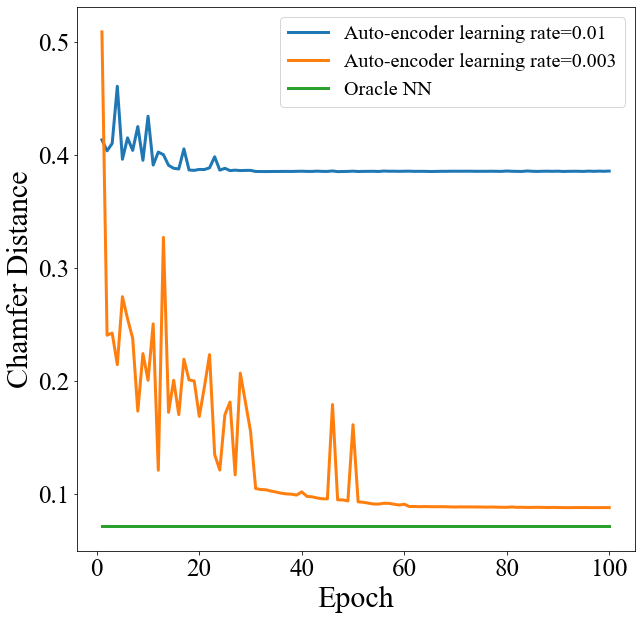

In [93]:
results_list = ['stats_finecd_epochval.npz', 'stats_finecd_itertrain.npz']
results_list = [results_list[0]]

fig = plt.figure(figsize=(10,10))
for row, log in enumerate(logs_list):   
    for col, result in enumerate(results_list): 
        file = os.path.join(address_0, '{}/{}'.format(log,result))
        stats = np.load(file)
        if row == 0:
            label = 'Auto-encoder' + ' learning rate=0.01'
        else:
            label = 'Auto-encoder' + ' learning rate=0.003'
        plt.plot(stats["iter_loss"][:,0], stats["iter_loss"][:,1],'-', linewidth ='3',label = '{}'.format(label))
        plt.tick_params(labelsize=25)
        plt.legend(fontsize=20)
        plt.xlabel('Epoch',size=30)
        plt.ylabel('Chamfer Distance',size=30)
        plt.rcParams["font.family"] = "Times New Roman"
plt.plot(stats["iter_loss"][:,0], len(stats["iter_loss"][:,0])*[0.0719],linewidth ='3',label ='{}'.format('Oracle NN'))
plt.legend(fontsize=20)
#plt.show()
plt.savefig('../figs/model/ae_testloss.png')

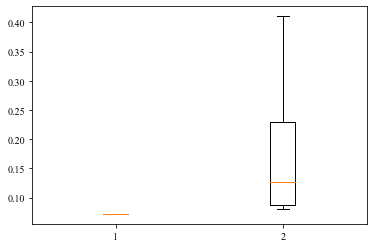

In [86]:
import matplotlib.pyplot as plt
fig = plt.figure()  # 创建画布
ax = plt.subplot()  # 创建作图区域
# 蓝色矩形的红线：50%分位点是4.5,上边沿：25%分位点是2.25,下边沿：75%分位点是6.75
ax.boxplot([[0.071927], [0.0872, 0.1462, 0.4106, 0.4106,0.1699, 0.1054, 0.0872, 0.0806]])
plt.show()
